In [1]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO

## Load images and text file into the variables below.

In [2]:
image = cv2.imread('Load These Files/W0001_0001.png', cv2.IMREAD_COLOR) #(x1,x2,y1,y2)
bin_image = cv2.imread('Load These Files/W0002_0001.png', cv2.IMREAD_COLOR)
file = np.loadtxt('Load These Files/XYCoordinates.txt')


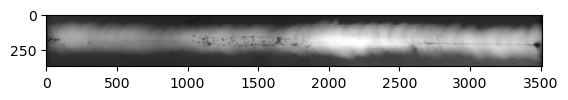

In [3]:
plt.imshow(image)

## Save full weld image with bounding boxes (append boxes to image)
### See: bound_test.png image for a smaller example.


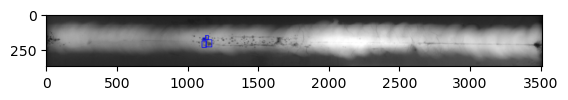

In [4]:
bound_image = image.copy()
for f in file:
    cv2.rectangle(bound_image, (int(f[0]), int(f[2])), (int(f[1]), int(f[3])), (0,0,255), 4)
plt.imshow(bound_image)

In [5]:
cv2.imwrite("bound_test.png",bound_image)

True

## Save cropped images from bounding box coordinates

In [6]:
#note (x1,x2,y1,y2)
for i,f in enumerate(file):
    crop = image[int(f[2]):int(f[3]),int(f[0]):int(f[1])]
    cv2.imwrite(f"cropped_test_{i}.png",crop)

## Load 4 cropped images one by one and put images in grayscale

In [7]:
for i in range(4):
    img = cv2.imread(f"cropped_test_{i}.png",cv2.IMREAD_GRAYSCALE)
    bilinear_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR) #resize to what?
    cv2.imwrite(f"resized_test_{i}.png",bilinear_img)

 ## load one by one and rotate 90 degrees clockwise and save images

In [10]:
for i in range(4):
    img = cv2.imread(f"resized_test_{i}.png",cv2.IMREAD_GRAYSCALE)
    rot = cv2.transpose(img)
    rot = cv2.flip(rot,flipCode=1) # flip 180
    cv2.imwrite(f"rotated_test_{i}.png",rot)

## Turn temp_bin_image values from black/white to black/red.

In [21]:
temp_bin_image = bin_image.copy()
temp_bin_image[:,:,0] = np.zeros([temp_bin_image.shape[0], temp_bin_image.shape[1]])
temp_bin_image[:,:,1] = np.zeros([temp_bin_image.shape[0], temp_bin_image.shape[1]])

blend = cv2.addWeighted(image,0.5,temp_bin_image,0.5,0)

cv2.imwrite(f"temp_bin_image.png",blend)

True

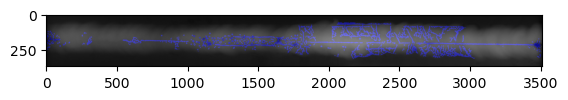

In [22]:
plt.imshow(blend)

## Show an example of: (AB)T = (BT)(AT)

In [29]:
A = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
left_side = np.matmul(A,B).T
right_side = np.matmul(B.T,A.T)

In [32]:
print(np.equal(left_side, right_side))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
